<a href="https://colab.research.google.com/github/Aicoaching2025/LinearRegressionFinance/blob/main/Advanced_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best parameters found: {'poly__degree': 1, 'regressor': Ridge(), 'regressor__alpha': 0.1}
Best cross-validation R²: 0.9974474252764786
Test R²: 0.9973332356392842
Test MSE: 95.3306800907763


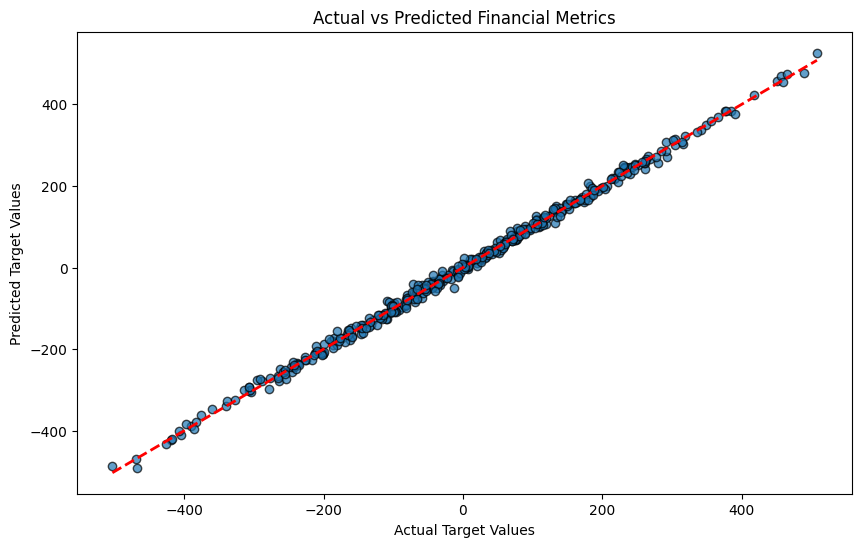

RANSAC Test R²: 0.9972872292759489
RANSAC Test MSE: 96.9753015540996


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RANSACRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ----------------------------
# Step 1: Generate a Synthetic Dataset
# ----------------------------
# Generate synthetic regression data with 2000 rows and 10 features
X, y = make_regression(n_samples=2000, n_features=10, noise=10.0, random_state=42)
# Convert to a DataFrame for consistency with the rest of the pipeline
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(10)])
df['target'] = y

# Optionally, save to CSV if you want to reuse it later
df.to_csv('synthetic_financial_data.csv', index=False)

# ----------------------------
# Step 2: Prepare the Data
# ----------------------------
# For this demonstration, we use the generated DataFrame directly.
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------
# Step 3: Build an Advanced Regression Pipeline
# ----------------------------
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', Ridge())
])

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'poly__degree': [1, 2, 3],  # Allow the model to decide on the complexity
    'regressor': [Ridge(), Lasso()],  # Test both regularization methods
    'regressor__alpha': [0.1, 1.0, 10.0]  # Regularization strength
}

# Use GridSearchCV to find the best combination of parameters using 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation R²:", grid_search.best_score_)

# ----------------------------
# Step 4: Evaluate the Best Model
# ----------------------------
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Compute performance metrics
test_r2 = r2_score(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
print("Test R²:", test_r2)
print("Test MSE:", test_mse)

# ----------------------------
# Step 5: Visualize Predictions
# ----------------------------
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs Predicted Financial Metrics')
plt.show()

# ----------------------------
# Step 6: (Optional) Robust Regression with RANSAC
# ----------------------------
ransac = RANSACRegressor(LinearRegression(), min_samples=0.5, residual_threshold=5.0, random_state=42)
ransac.fit(X_train, y_train)
y_pred_ransac = ransac.predict(X_test)
print("RANSAC Test R²:", r2_score(y_test, y_pred_ransac))
print("RANSAC Test MSE:", mean_squared_error(y_test, y_pred_ransac))
